In [4]:
from math import e

#Defining MDP
states = []
for i in range(21):
    for j in range(21):
        states.append((i, j))

jackmdp = {_:{} for _ in states}

gamma = 0.9

actions = [_ for _ in range(-5, 6)]

poisson={}
lambrent1 = 3
lambrent2 = 4
lambret1 = 3
lambret2 = 2
fact = [1]*21
for i in range(1, 21):
    fact[i]=fact[i-1]*i
cap = 10
for i in set([lambrent1, lambrent2, lambret1, lambret2]):
    tmp = [0.0]*(cap+1)
    exp = e**(-i)
    for j in range(cap):
        tmp[j]=(((i)**j)/fact[j])*exp
    tmp[cap]=1-sum(tmp[:cap])
    poisson[i]=tmp

def chkv(v, newv, smol):
    return max(abs(newv[s] - v[s]) for s in v) > smol


In [5]:
#Filling MDP

p = poisson



for state in states:
    transitions = {}
    for action in actions:
        if action > state[0] or -action > state[1]:
            transitions[action]=[(0, state, 0.0)]
            continue
        tmp = {}
        
        a=[state[0]-action, state[1]+action]
        if(a[0]<0 or a[1]<0):
            continue
        a[0]=min(a[0],20)
        a[1]=min(a[1],20)
        for r1 in range(cap+1):
            for r2 in range(cap+1):
                for b1 in range(cap+1):
                    for b2 in range(cap+1):
                        realr1 = min(r1, a[0])
                        realr2 = min(r2, a[1])
                        next=(int(max(0, min(a[0]-realr1+b1, 20))), int(max(0, min(a[1]-realr2+b2, 20))))
                        prob = p[lambrent1][r1]*p[lambrent2][r2]*p[lambret1][b1]*p[lambret2][b2]
                        rew = -2*(abs(action))+realr1*10+realr2*10
                        if next not in tmp:
                            tmp[next] = [0.0, 0.0]
                        tmp[next][0]+=prob
                        tmp[next][1]+=prob*rew
        temp = []
        for j in states:
            if j in tmp:
                if(tmp[j][0]>0):
                    tmp[j][1]/=tmp[j][0]
                    temp.append((tmp[j][0], j, tmp[j][1]))
        transitions[action]=temp
    jackmdp[state]=transitions

5


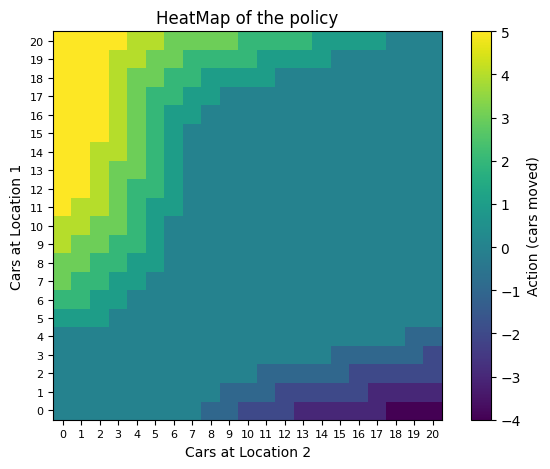

In [8]:
import numpy as np
import matplotlib.pyplot as plt

v = {} #ValueFunction
newv = {}
oldpolicy = {} #DeterministicPolicy
newpolicy = {}
for _ in states:
    v[_]=10.0
    newv[_] = 0.0
    oldpolicy[_]=5
    newpolicy[_] = 0
smol = 1e-4

it = 0
while(newpolicy != oldpolicy):
    it+=1
    for _ in states:
        v[_]=10.0
        newv[_] = 0.0
    oldpolicy=newpolicy.copy()
    #PolicyEvaluation
    while(chkv(newv, v, smol)):
        v = newv.copy()
        for state in states:
            x = 0
            # print(it)
            # print(it1)
            l = jackmdp[state][newpolicy[state]]
            for i in l:
                x+=i[0]*(i[2]+gamma*v[i[1]])
            newv[state]=x

    #PolicyImprovement
    for state in states:
        besta = 0
        bestexpre = -float('inf')
        for action in actions:
            expre = 0
            l = jackmdp[state][action]
            for i in l:
                expre+=i[0]*(i[2]+gamma*newv[i[1]])
            if(expre>bestexpre):
                besta = action
                bestexpre = expre
        newpolicy[state]=besta

print(it)
policy_grid = np.zeros((21,21))
for (loc1, loc2), action in newpolicy.items():
    policy_grid[loc1, loc2] = action
im = plt.imshow(
    policy_grid,
    origin="lower",      # IMPORTANT: (0,0) at bottom-left
    cmap="viridis",
    interpolation="nearest"
)

plt.colorbar(im, label="Action (cars moved)")
plt.xlabel("Cars at Location 2")
plt.ylabel("Cars at Location 1")
plt.title("HeatMap of the policy")

plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0, 21, 1))
plt.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()

In [7]:
for _ in states:
    v[_]=10.0
    newv[_] = 0.0

#PolicyEvaluation
while(chkv(newv, v, smol)):
    v = newv.copy()
    for state in states:
        x = 0
        # print(it)
        # print(it1)
        l = jackmdp[state][newpolicy[state]]
        for i in l:
            x+=i[0]*(i[2]+gamma*v[i[1]])
        newv[state]=x
print(newv)

{(0, 0): 421.3938273034233, (0, 1): 431.3660504153896, (0, 2): 441.2217510013677, (0, 3): 450.82710200029277, (0, 4): 460.0599702176655, (0, 5): 468.85217605335913, (0, 6): 477.19063013234864, (0, 7): 485.0944689047992, (0, 8): 492.9577719172782, (0, 9): 500.4535769063652, (0, 10): 507.86568169604993, (0, 11): 514.9711769873595, (0, 12): 521.7279572565349, (0, 13): 528.3282624811038, (0, 14): 534.7168394810857, (0, 15): 540.8033817783012, (0, 16): 546.606154687021, (0, 17): 552.1414892011142, (0, 18): 557.565637888492, (0, 19): 562.7682967078297, (0, 20): 567.7176151079858, (1, 0): 431.2675834570991, (1, 1): 441.23974036375995, (1, 2): 451.0951124289143, (1, 3): 460.69962085765934, (1, 4): 469.930985289198, (1, 5): 478.7210594118841, (1, 6): 487.0568994542543, (1, 7): 494.95777191727814, (1, 8): 502.45357690636536, (1, 9): 509.8656816960501, (1, 10): 516.9711769873595, (1, 11): 523.727957256534, (1, 12): 530.3282624811033, (1, 13): 536.716839481086, (1, 14): 542.8033817783012, (1, 15):